In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

# Load dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

# For label decoding later
target_names = iris.target_names


In [13]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)


In [14]:
# Initialize and train SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 1.0000


Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



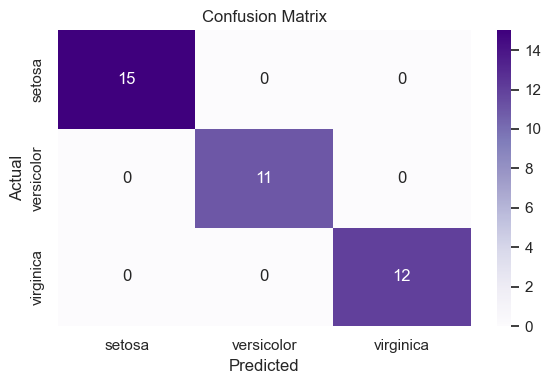

In [15]:
# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Purples',
            xticklabels=target_names, yticklabels=target_names, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("../visuals/svm_confusion_matrix.png")
plt.show()


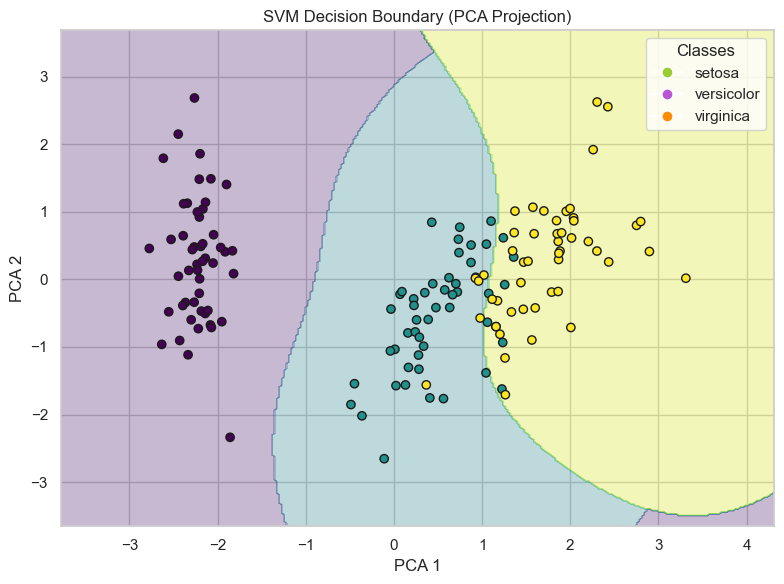

In [16]:
# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Fit SVM on reduced data
svm_vis_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_vis_model.fit(X_pca, y)

# Create meshgrid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = svm_vis_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
legend_labels = [plt.Line2D([0], [0], marker='o', color='w',
                            label=label, markerfacecolor=col, markersize=8)
                 for label, col in zip(target_names, ['yellowgreen', 'mediumorchid', 'darkorange'])]
plt.legend(handles=legend_labels, title="Classes")
plt.title("SVM Decision Boundary (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.tight_layout()
plt.savefig("../visuals/svm_decision_boundary.png")
plt.show()


In [17]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearch
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5, verbose=0)
grid.fit(X_train, y_train)

# Best parameters
print("Best Parameters from GridSearchCV:\n")
print(grid.best_params_)

# Evaluate best model
grid_y_pred = grid.predict(X_test)
print("\nAccuracy with Best Parameters:", accuracy_score(y_test, grid_y_pred))

# Optional: Save best model
best_svm_model = grid.best_estimator_


Best Parameters from GridSearchCV:

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

Accuracy with Best Parameters: 1.0


### 🔍 Observations

- The SVM model performed extremely well on the Iris dataset, achieving high accuracy.
- Using PCA helped us visualize decision boundaries effectively in 2D space.
- Hyperparameter tuning showed that kernel and regularization (`C`) significantly affect performance.
- In real-world applications, always scale features and consider kernel choice based on data separability.

### 📌 Key Takeaways

- SVM works great for classification problems with clear margins.
- Choosing the right kernel is crucial — start with `rbf` if unsure.
- Hyperparameter tuning should be an integral part of your pipeline.
